In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
class Solution:
    # one instance of problem solution
    def __init__(self, value):
        self.value = value
        self.dominates = []
        self.dominated_cardinal = 0
        self.rank = None

In [26]:
def visualize(population):
    for s in population:
        color = 'm'
        if s.rank != None:
            if s.rank % 3 == 1:
                color = 'r'
            elif s.rank % 3 == 2:
                color = 'g'
            else:
                color = 'b'
        plt.scatter(*s.value, c=color)
    plt.show()

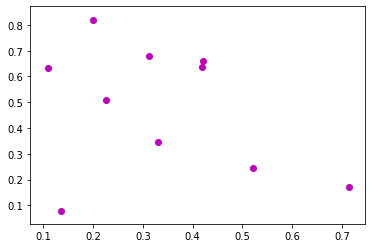

In [83]:
# prepare test population
popsize = 10
values = np.random.random_sample((popsize,2))

initial_population = []

for v in values:
    initial_population.append(Solution(v))

visualize(initial_population)

In [45]:
def dominates(p,q):
    # returns 1 if p dominates q, -1
    # if q dominates p, 0 otherwise
    if p.value[0] >= q.value[0] and p.value[1] >= q.value[1]:
        return 1
    elif p.value[0] <= q.value[0] and p.value[1] <= q.value[1]:
        return -1
    else:
        return 0

In [46]:
def fast_non_dominated_sort(population):
    
    fronts = []
    fronts.append([])
    
    for p in population:
        for q in population:
            domination = dominates(p,q)
            if domination == 1:
                p.dominates.append(q)
            elif domination == -1:
                p.dominated_cardinal += 1
        if p.dominated_cardinal == 0:
            p.rank = 1
            fronts[0].append(p)
    
    i = 0
    while len(fronts[i]) != 0:
        next_front = []
        for p in fronts[i]:
            for q in p.dominates:
                q.dominated_cardinal -= 1
                if q.dominated_cardinal == 0:
                    q.rank = i + 2
                    next_front.append(q)
        i += 1
        fronts.append(next_front)
    
    fronts.pop()
    return fronts

In [85]:
nondom = fast_non_dominated_sort(initial_population)

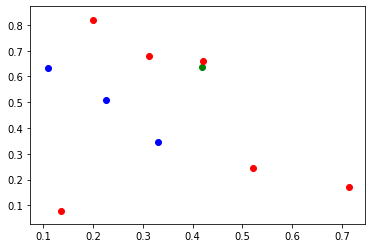

In [87]:
visualize(initial_population)

In [75]:
f1 = lambda solutions: [x.value[0] for x in solutions]
f2 = lambda solutions: [x.value[1] for x in solutions]

In [72]:
def get_reference_points(divisions):
    coords = np.zeros((divisions+1,))
    coords[:divisions] = np.arange(0,1,1/divisions)
    coords[divisions] = 1
    return [[x,y] for x,y in zip(coords,reversed(coords))]

In [73]:
get_reference_points(4)

[[0.0, 1.0], [0.25, 0.75], [0.5, 0.5], [0.75, 0.25], [1.0, 0.0]]

In [76]:
def normalize(score_functions, candidates):
    normalized_functions = []
    for f in score_functions:
         
        for 

In [97]:
points = [s.value for s in nondom[0]]
points = np.array(points)

In [98]:
weights = np.eye(2)
weights[weights==0] = 1e6
weights

array([[1.e+00, 1.e+06],
       [1.e+06, 1.e+00]])

In [99]:
asf = np.max(points * weights[:,None,:], axis=2)
I = np.argmin(asf, axis=1)
points[I,:]

array([[0.71272308, 0.17180719],
       [0.20045996, 0.8198595 ]])

In [105]:
print(weights[:,None,:])
print(points)

[[[1.e+00 1.e+06]]

 [[1.e+06 1.e+00]]]
[[0.20045996 0.8198595 ]
 [0.42097463 0.66178028]
 [0.71272308 0.17180719]
 [0.5203204  0.24363993]
 [0.31324361 0.67785879]]
